In [2]:
# program to predict the Income of People
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# read csv file
df = pd.read_csv('https://raw.githubusercontent.com/vageesh88/ML-Projects/master/Flight%20Price%20Prediction/Data_Train%20Sheet1.csv')
df.columns = df.columns.str.replace(' ','_')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
# check size of dataset
df.shape

(10683, 11)

In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


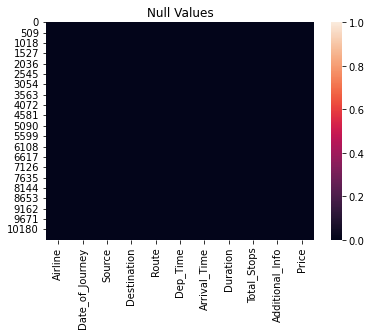

In [5]:
# check for any null values
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [6]:
# summing up total null values in dataset
df.isnull().sum().sum()

2

In [7]:
# getting all column names to observe type of variables
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
df = df.dropna(how='any',axis=1)
df.isnull().sum().sum()

0

In [ ]:
# checking corelation
corr_mat = df.corr()
plt.figure(figsize=(22,7))
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [ ]:
# encoding string type data to use them in plotting and making model on basis of observations
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Education'] = LE.fit_transform(df['Education'])

In [ ]:
LE2 = LabelEncoder()
df['Marital_status'] = LE2.fit_transform(df['Marital_status'])

In [ ]:
LE3 = LabelEncoder()
df['Occupation'] = LE3.fit_transform(df['Occupation'])

In [ ]:
LE4 = LabelEncoder()
df['Race'] = LE4.fit_transform(df['Race'])

In [ ]:
LE5 = LabelEncoder()
df['Relationship'] = LE5.fit_transform(df['Relationship'])

In [ ]:
LE6 = LabelEncoder()
df['Sex'] = LE6.fit_transform(df['Sex'])

In [ ]:
LE7 = LabelEncoder()
df['Native_country'] = LE7.fit_transform(df['Native_country'])

In [ ]:
LE8 = LabelEncoder()
df['Income'] = LE8.fit_transform(df['Income'])

In [ ]:
LE9 = LabelEncoder()
df['Workclass'] = LE9.fit_transform(df['Workclass'])

In [ ]:
LE.inverse_transform([0,1,2,3,4,5])

In [ ]:
LE2.inverse_transform(df['Marital_status'])

In [ ]:
# plotting density of values in each column
import warnings
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Preprocessing
# spliting dependent and independent variables on x and y axis
x = df.drop('Income',axis=1)
y = df['Income']

In [ ]:
x

In [ ]:
y

In [ ]:
x.dtypes

In [ ]:
# making scatter plot of Income vs other independent variables in dataset for observations
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=10:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Income',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# use Random Forest to make model for Income prediction
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=60)
y_train.head()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 101, n_jobs=-1)
rf.fit(x_train,y_train)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
# find accuracy of predictions made by comparing to test sample
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
# save model in pickle file
import pickle
filename= 'Census_Income_model.pickle'
pickle.dump(RandomForestClassifier,open(filename,'wb'))